In [4]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 创建一个模拟数据集
X, y = make_blobs(random_state=0)
# 将数据和标签划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 将模型实例化，并用它来拟合训练集
logreg = LogisticRegression().fit(X_train, y_train)
# 在测试集上评估模型
print('Test set score: {:.2f}'.format(logreg.score(X_test, y_test)))

Test set score: 0.88


/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### 交叉验证

#### scikit-learn中的交叉验证

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(solver='lbfgs', multi_class='auto')

score = cross_val_score(logreg, iris.data, iris.target)
print('Cross-validation score: {}'.format(score))

Cross-validation score: [0.98039216 0.94117647 1.        ]


/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [6]:
score = cross_val_score(logreg, iris.data, iris.target, cv=5)
print('Cross-validation score: {}'.format(score))

Cross-validation score: [0.96666667 1.         0.93333333 0.96666667 1.        ]


/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [7]:
print('Average cross-validation score: {:.2f}'.format(score.mean()))

Average cross-validation score: 0.97


#### 分层K折交叉验证和其他策略

In [8]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

print('Cross-validation score: {}'.format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation score: [1.         1.         0.86666667 0.93333333 0.83333333]


/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [9]:
kfold = KFold(n_splits=3)
print('Cross-validation score: \n{}'.format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation score: 
[0. 0. 0.]


In [10]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print('Cross-validation score: \n{}'.format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation score: 
[0.98 0.96 0.96]


/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [11]:
# 留一法交叉验证
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print('Number of cv iteration: ', len(scores))
print('Mean accuracy: {:.2f}'.format(scores.mean()))

/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iter

/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iter

/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iter

Number of cv iteration:  150
Mean accuracy: 0.97


/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [12]:
# 打乱划分交叉验证
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print('Cross-validation scores: \n{}'.format(scores))

Cross-validation scores: 
[0.97333333 0.97333333 0.97333333 0.96       1.         0.97333333
 0.92       0.93333333 0.92       0.96      ]


/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [13]:
from sklearn.model_selection import GroupKFold
# 创建模拟数据集
X, y = make_blobs(n_samples=12, random_state=0)
# 假设前3个样本属于同一组，接下来的4个属于同一组，以此类推
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg, X, y, groups,cv=GroupKFold(n_splits=3))
print('Cross-validation scores: \n{}'.format(scores))

Cross-validation scores: 
[0.75       0.6        0.66666667]


### 网格搜索

In [14]:
# 简单的网格搜索实现
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print('Size of training set: {} size of test set: {}'.format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 对每种参数组合都训练一个scv
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 在测试集上评估svc
        score = svm.score(X_test, y_test)
        # 如果我们得到了更高的分数，则保存该分数和对应的参数
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print('Best score: {:.2f}'.format(best_score))
print('Best parameters: {}'.format(best_parameters))

Size of training set: 112 size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


In [15]:
from sklearn.svm import SVC
# 将数据划分为训练+验证集与测试集
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
# 将训练+验证集划分为训练集与验证集
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print('Size of training set: {} size of validation set: {} size of test set:' 
      '{}\n'.format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 对每种参数组合都训练一个svc
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 在验证集上评估svc
        score = svm.score(X_valid, y_valid)
        # 如果我们得到了更高的分数，则保存该分数和对应的参数
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# 在训练+验证集上重新构建一个模型，并在测试集上进行评估
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print('Best score on validation set: {:.2f}'.format(best_score))
print('Best parameters:', best_parameters)
print('Test set score whit best parameters: {:.2f}'.format(test_score))

Size of training set: 84 size of validation set: 28 size of test set:38

Best score on validation set: 0.96
Best parameters: {'C': 10, 'gamma': 0.001}
Test set score whit best parameters: 0.92


#### 交叉验证的网格搜索

In [16]:
import numpy as np

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 对于每种参数组合都训练一个svc
        svm = SVC(gamma=gamma, C=C)
        # 执行交叉验证
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # 计算交叉验证平均精度
        score = np.mean(scores)
        # 如果我们得到了更高的分数，则保存分数和对应的参数
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# 在训练+验证集上重新构建一个模型
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
print('Best score on validation set: {:.2f}'.format(best_score))
print('Best parameters:', best_parameters)
print('Test set score whit best parameters: {:.2f}'.format(test_score))

Best score on validation set: 0.97
Best parameters: {'C': 100, 'gamma': 0.01}
Test set score whit best parameters: 0.92


In [17]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print('Parameter grid: \n{}'.format(param_grid))

Parameter grid: 
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [20]:
grid_search.fit(X_train, y_train)

/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
print('Test set score: {:.2f}'.format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [22]:
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.97


In [23]:
print('Best estimator: \n{}'.format(grid_search.best_estimator_))

Best estimator: 
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [24]:
import pandas as pd
# 转换为DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# 显示前5行
display(results.head())

/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/envs/ys/lib/python3.7/site-packa

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000760,0.000146,0.000322,0.000023,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
1,0.000817,0.000160,0.000414,0.000073,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
2,0.000770,0.000125,0.000370,0.000058,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
3,0.000634,0.000027,0.000286,0.000003,0.001,1,"{'C': 0.001, 'gamma': 1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
4,0.000687,0.000069,0.000323,0.000054,0.001,10,"{'C': 0.001, 'gamma': 10}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852


In [25]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

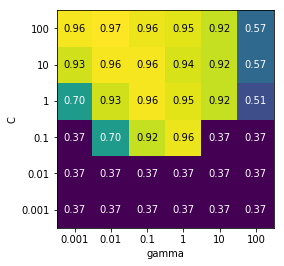

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

scores = np.array(results.mean_test_score).reshape(6,6)

# 对交叉验证平均分数作图
heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], 
        ylabel='C', yticklabels=param_grid['C'], cmap='viridis')

/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


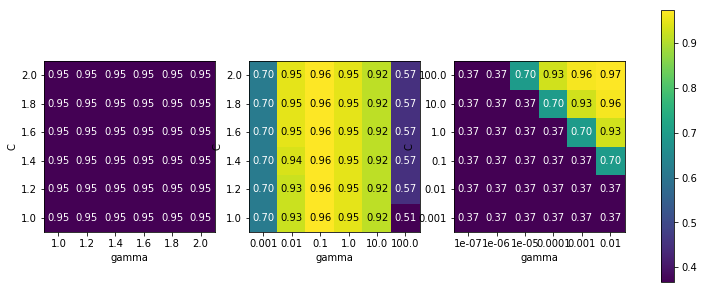

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6), 'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6), 'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-7, -2, 6)}
for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    # 对交叉验证平均分数作图
    scores_image = heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'], 
                           yticklabels=param_grid['C'], cmap='viridis', ax=ax)
plt.colorbar(scores_image, ax=axes.tolist())

In [28]:
param_grid = [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, 
              {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print('List of grids: \n{}'.format(param_grid))

List of grids: 
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [29]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.97


/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
results = pd.DataFrame(grid_search.cv_results_)
# 我们给出的是转置后的表格，这样更适合页面显示
display(results.T)

/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/envs/ys/lib/python3.7/site-packa

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000788546,0.000895596,0.000750256,0.000723791,0.000628996,0.000680685,0.000684118,0.000706911,0.000728178,0.000614786,...,0.000272179,0.000368309,0.000671387,0.000637627,0.000381804,0.000777721,0.000370598,0.000381899,0.000318766,0.00034194
std_fit_time,0.000111172,0.00025338,8.24131e-05,0.000167462,3.76558e-05,5.11971e-05,2.63046e-05,4.93422e-05,7.6511e-05,1.35883e-05,...,8.12808e-06,1.71273e-05,0.000121602,5.87661e-05,3.30225e-06,0.000340002,5.04778e-05,7.0721e-05,1.61738e-05,3.65502e-05
mean_score_time,0.000348759,0.000434351,0.000343132,0.000323009,0.000287962,0.000320721,0.000335884,0.000351429,0.000353289,0.000304794,...,0.000182533,0.000198793,0.000232506,0.00022521,0.000191593,0.000314999,0.00030098,0.000251961,0.000188065,0.000197363
std_score_time,3.73828e-05,0.000101733,7.38455e-05,4.58115e-05,9.38461e-06,4.61056e-05,2.49598e-05,6.09028e-05,6.69265e-05,4.40621e-05,...,5.8451e-06,1.03182e-05,3.27991e-05,1.38362e-05,8.47644e-07,8.49916e-05,7.53647e-05,7.33504e-05,3.4266e-06,1.33023e-05
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,...,0.958333,0.916667,0.875,0.541667,0.375,0.916667,0.958333,1,0.958333,0.958333
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1,1,0.956522,0.521739,0.347826,0.826087,0.913043,0.956522,1,1


In [31]:
# 嵌套交叉验证
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)
print('Cross-validation scores: ',scores)
print('Mean cross-validation score:', scores.mean())

Cross-validation scores:  [0.96666667 1.         0.9        0.96666667 1.        ]
Mean cross-validation score: 0.9666666666666668


In [32]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # 对于外层交叉验证的每次数据划分，split方法返回索引值
    for training_samples, test_samples in outer_cv.split(X, y):
        # 利用内层交叉验证找到最佳参数
        best_parms = {}
        best_score = -np.inf
        # 遍历参数
        for parameters in parameter_grid:
            # 在内层划分中累加分数
            cv_scores = []
            # 遍历内层交叉验证
            for inner_train, inner_test in inner_cv.split(
                X[training_samples], y[training_samples]):
                # 对于给定的参数和训练数据来构建分类器
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # 在内层测试集上进行评估
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # 计算内层交叉验证的平均分数
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # 如果比前面的模型都好，则保存其参数
                best_score = mean_score
                best_parms = parameters
        # 利用外层训练集和最佳参数来构建模型
        clf = Classifier(**best_parms)
        clf.fit(X[training_samples], y[training_samples])
        # 评估模型
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [33]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), 
                   StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print('Cross-validation scores: {}'.format(scores))

Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]


### 评估指标与评分

In [34]:
from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [35]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print('Unique predicted labels: {}'.format(np.unique(pred_most_frequent)))
print('Test score: {:.2f}'.format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [36]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print('Test score: {:.2f}'.format(tree.score(X_test, y_test)))

Test score: 0.92


In [37]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train,y_train)
pred_dummy = dummy.predict(X_test)
print('Dummy score: {:.2f}'.format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print('Logreg score: {:.2f}'.format(logreg.score(X_test, y_test)))

Dummy score: 0.83
Logreg score: 0.98


/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### 混淆矩阵

In [38]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print('Confusion matrix: \n{}'.format(confusion))

Confusion matrix: 
[[401   2]
 [  8  39]]


In [39]:
print('Most frequent class')
print(confusion_matrix(y_test, pred_most_frequent))
print('\nDummy model:')
print(confusion_matrix(y_test, pred_dummy))
print('\nDecision tree:')
print(confusion_matrix(y_test, pred_tree))
print('\nLogistic Regression:')
print(confusion_matrix(y_test, pred_logreg))

Most frequent class
[[403   0]
 [ 47   0]]

Dummy model:
[[367  36]
 [ 41   6]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression:
[[401   2]
 [  8  39]]


In [40]:
from sklearn.metrics import f1_score
print('f1 score most frequent: {:.2f}'.format(f1_score(y_test, pred_most_frequent)))
print('f1 score dummy: {:.2f}'.format(f1_score(y_test, pred_dummy)))
print('f1 score tree: {:.2f}'.format(f1_score(y_test, pred_tree)))
print('f1 score logistic regression: {:.2f}'.format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.13
f1 score tree: 0.55
f1 score logistic regression: 0.89


/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

   micro avg       0.90      0.90      0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
print(classification_report(y_test, pred_dummy, target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.90      0.91      0.91       403
        nine       0.14      0.13      0.13        47

   micro avg       0.83      0.83      0.83       450
   macro avg       0.52      0.52      0.52       450
weighted avg       0.82      0.83      0.82       450



In [43]:
print(classification_report(y_test, pred_logreg, target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.98      1.00      0.99       403
        nine       0.95      0.83      0.89        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



In [44]:
print(classification_report(y_test, pred_dummy, target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.90      0.91      0.91       403
        nine       0.14      0.13      0.13        47

   micro avg       0.83      0.83      0.83       450
   macro avg       0.52      0.52      0.52       450
weighted avg       0.82      0.83      0.82       450



In [55]:
print(classification_report(y_test, pred_logreg, target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.98      1.00      0.99       403
        nine       0.95      0.83      0.89        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



In [45]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

In [63]:
import matplotlib as mpl
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap

def discrete_scatter(x1, x2, y=None, markers=None, s=10, ax=None,
                     labels=None, padding=.2, alpha=1, c=None, markeredgewidth=None):
    if ax is None:
        ax = plt.gca()

    if y is None:
        y = np.zeros(len(x1))

    unique_y = np.unique(y)

    if markers is None:
        markers = ['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', '8', '<', '>'] * 10

    if len(markers) == 1:
        markers = markers * len(unique_y)

    if labels is None:
        labels = unique_y

    # lines in the matplotlib sense, not actual lines
    lines = []

    current_cycler = mpl.rcParams['axes.prop_cycle']

    for i, (yy, cycle) in enumerate(zip(unique_y, current_cycler())):
        mask = y == yy
        # if c is none, use color cycle
        if c is None:
            color = cycle['color']
        elif len(c) > 1:
            color = c[i]
        else:
            color = c
        # use light edge for dark markers
        if np.mean(colorConverter.to_rgb(color)) < .4:
            markeredgecolor = "grey"
        else:
            markeredgecolor = "black"

        lines.append(ax.plot(x1[mask], x2[mask], markers[i], markersize=s,
                             label=labels[i], alpha=alpha, c=color,
                             markeredgewidth=markeredgewidth,
                             markeredgecolor=markeredgecolor)[0])

    if padding != 0:
        pad1 = x1.std() * padding
        pad2 = x2.std() * padding
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.set_xlim(min(x1.min() - pad1, xlim[0]), max(x1.max() + pad1, xlim[1]))
        ax.set_ylim(min(x2.min() - pad2, ylim[0]), max(x2.max() + pad2, ylim[1]))

    return lines

In [62]:
def plot_2d_scores(classifier, X, ax=None, eps=None, alpha=1, cm="viridis",
                   function=None):
    # binary with fill
    if eps is None:
        eps = X.std() / 2.

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    if function is None:
        function = getattr(classifier, "decision_function",
                           getattr(classifier, "predict_proba"))
    else:
        function = getattr(classifier, function)
    decision_values = function(X_grid)
    if decision_values.ndim > 1 and decision_values.shape[1] > 1:
        # predict_proba
        decision_values = decision_values[:, 1]
    grr = ax.imshow(decision_values.reshape(X1.shape),
                    extent=(x_min, x_max, y_min, y_max), aspect='auto',
                    origin='lower', alpha=alpha, cmap=cm)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    return grr

In [69]:
def _call_classifier_chunked(classifier_pred_or_decide, X):
    # The chunk_size is used to chunk the large arrays to work with x86
    # memory models that are restricted to < 2 GB in memory allocation. The
    # chunk_size value used here is based on a measurement with the
    # MLPClassifier using the following parameters:
    # MLPClassifier(solver='lbfgs', random_state=0,
    #               hidden_layer_sizes=[1000,1000,1000])
    # by reducing the value it is possible to trade in time for memory.
    # It is possible to chunk the array as the calculations are independent of
    # each other.
    # Note: an intermittent version made a distinction between
    # 32- and 64 bit architectures avoiding the chunking. Testing revealed
    # that even on 64 bit architectures the chunking increases the
    # performance by a factor of 3-5, largely due to the avoidance of memory
    # swapping.
    chunk_size = 10000

    # We use a list to collect all result chunks
    Y_result_chunks = []

    # Call the classifier in chunks.
    for x_chunk in np.array_split(X, np.arange(chunk_size, X.shape[0],
                                               chunk_size, dtype=np.int32),
                                  axis=0):
        Y_result_chunks.append(classifier_pred_or_decide(x_chunk))

    return np.concatenate(Y_result_chunks)

In [70]:
def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None, alpha=1,
                      cm=cm2, linewidth=None, threshold=None,
                      linestyle="solid"):
    # binary?
    if eps is None:
        eps = X.std() / 2.

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    if hasattr(classifier, "decision_function"):
        decision_values = _call_classifier_chunked(classifier.decision_function,
                                                   X_grid)
        levels = [0] if threshold is None else [threshold]
        fill_levels = [decision_values.min()] + levels + [
            decision_values.max()]
    else:
        # no decision_function
        decision_values = _call_classifier_chunked(classifier.predict_proba,
                                                   X_grid)[:, 1]
        levels = [.5] if threshold is None else [threshold]
        fill_levels = [0] + levels + [1]
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, alpha=alpha, cmap=cm)
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black", alpha=alpha, linewidths=linewidth,
                   linestyles=linestyle, zorder=5)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

In [71]:
cm_cycle = ListedColormap(['#0000aa', '#ff5050', '#50ff50', '#9040a0', '#fff000'])
cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])
cm2 = ListedColormap(['#0000aa', '#ff2020'])

cdict = {'red': [(0.0, 0.0, cm2(0)[0]),
                 (1.0, cm2(1)[0], 1.0)],

         'green': [(0.0, 0.0, cm2(0)[1]),
                   (1.0, cm2(1)[1], 1.0)],

         'blue': [(0.0, 0.0, cm2(0)[2]),
                  (1.0, cm2(1)[2], 1.0)]}

ReBl = LinearSegmentedColormap("ReBl", cdict)

def plot_decision_threshold():
    from sklearn.datasets import make_blobs
    from sklearn.svm import SVC
    from sklearn.model_selection import train_test_split

    X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2],
                      random_state=22)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    fig, axes = plt.subplots(2, 3, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
    plt.suptitle("decision_threshold")
    axes[0, 0].set_title("training data")
    discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=axes[0, 0])

    svc = SVC(gamma=.05).fit(X_train, y_train)
    axes[0, 1].set_title("decision with threshold 0")
    discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=axes[0, 1])
    plot_2d_scores(svc, X_train, function="decision_function", alpha=.7,
                   ax=axes[0, 1], cm=ReBl)
    plot_2d_separator(svc, X_train, linewidth=3, ax=axes[0, 1])
    axes[0, 2].set_title("decision with threshold -0.8")
    discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=axes[0, 2])
    plot_2d_separator(svc, X_train, linewidth=3, ax=axes[0, 2], threshold=-.8)
    plot_2d_scores(svc, X_train, function="decision_function", alpha=.7,
                   ax=axes[0, 2], cm=ReBl)

    axes[1, 0].set_axis_off()

    mask = np.abs(X_train[:, 1] - 7) < 5
    bla = np.sum(mask)

    line = np.linspace(X_train.min(), X_train.max(), 100)
    axes[1, 1].set_title("Cross-section with threshold 0")
    axes[1, 1].plot(line, svc.decision_function(np.c_[line, 10 * np.ones(100)]), c='k')
    dec = svc.decision_function(np.c_[line, 10 * np.ones(100)])
    contour = (dec > 0).reshape(1, -1).repeat(10, axis=0)
    axes[1, 1].contourf(line, np.linspace(-1.5, 1.5, 10), contour, alpha=0.4, cmap=cm)
    discrete_scatter(X_train[mask, 0], np.zeros(bla), y_train[mask], ax=axes[1, 1])
    axes[1, 1].set_xlim(X_train.min(), X_train.max())
    axes[1, 1].set_ylim(-1.5, 1.5)
    axes[1, 1].set_xticks(())
    axes[1, 1].set_ylabel("Decision value")

    contour2 = (dec > -.8).reshape(1, -1).repeat(10, axis=0)
    axes[1, 2].set_title("Cross-section with threshold -0.8")
    axes[1, 2].contourf(line, np.linspace(-1.5, 1.5, 10), contour2, alpha=0.4, cmap=cm)
    discrete_scatter(X_train[mask, 0], np.zeros(bla), y_train[mask], alpha=.1, ax=axes[1, 2])
    axes[1, 2].plot(line, svc.decision_function(np.c_[line, 10 * np.ones(100)]), c='k')
    axes[1, 2].set_xlim(X_train.min(), X_train.max())
    axes[1, 2].set_ylim(-1.5, 1.5)
    axes[1, 2].set_xticks(())
    axes[1, 2].set_ylabel("Decision value")
    axes[1, 0].legend(['negative class', 'positive class'])

NameError: name 'cm' is not defined

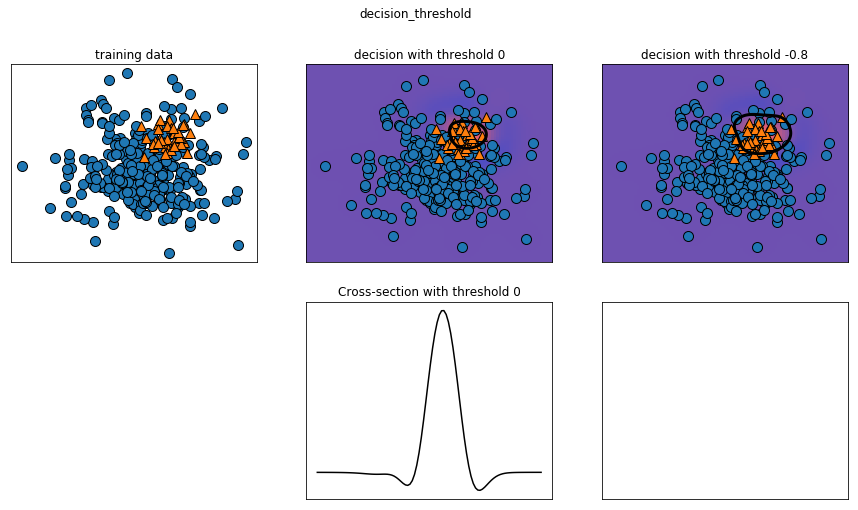

In [72]:
plot_decision_threshold()

In [65]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

   micro avg       0.88      0.88      0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [68]:
y_pred_lower_threshold = svc.decision_function(X_test) >-.8

In [69]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

   micro avg       0.83      0.83      0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



In [70]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

Text(0, 0.5, 'Recall')

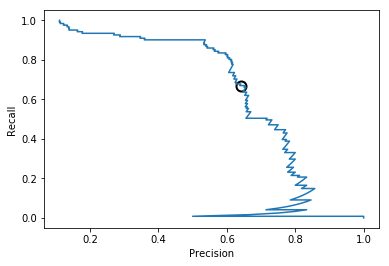

In [74]:
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall,thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

# 
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, 
         label='threshold zero', fillstyle='none', c='k', mew=2)
plt.plot(precision, recall, label='precision recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')

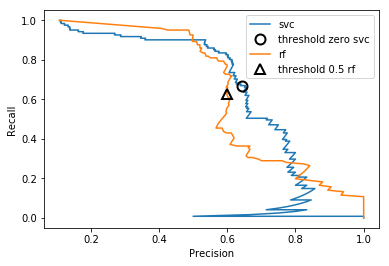

In [75]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train,y_train)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label='svc')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='threshold zero svc', 
         fillstyle='none', c='k', mew=2)

plt.plot(precision_rf, recall_rf, label='rf')
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', markersize=10, 
         label='threshold 0.5 rf', fillstyle='none', mew=2)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(loc='best')

In [77]:
print('f1_score of random forest: {:.3f}'.format(f1_score(y_test, rf.predict(X_test))))
print('f1_score of svc: {:.3f}'.format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


In [78]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print('Average precision of random forest: {:.3f}'.format(ap_rf))
print('Average precision of svc: {:.3f}'.format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


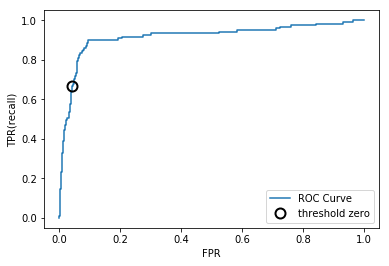

In [79]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR(recall)')
# 找到最接近于0的阈值
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='threshold zero', 
         fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

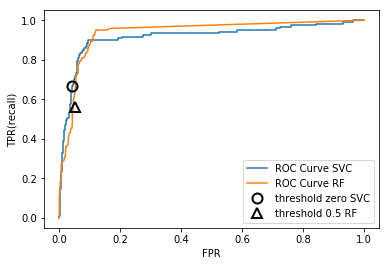

In [82]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve SVC')
plt.plot(fpr_rf, tpr_rf, label='ROC Curve RF')
plt.xlabel('FPR')
plt.ylabel('TPR(recall)')
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, 
         label='threshold zero SVC', fillstyle='none', c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10, label='threshold 0.5 RF', 
         fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

In [83]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print('AUC for Random Forest: {:.3f}'.format(rf_auc))
print('AUC for SVC: {:.3f}'.format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


gamma = 1.00 accuracy = 0.90 AUC = 0.50
gamma = 0.05 accuracy = 0.90 AUC = 1.00
gamma = 0.01 accuracy = 0.90 AUC = 1.00


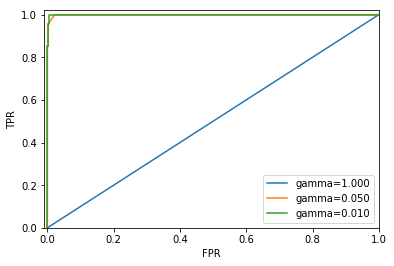

In [84]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)
plt.figure()
for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print('gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}'.format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label='gamma={:.3f}'.format(gamma))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc='best')

#### 多分类指标

In [85]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, pred)))
print('Confusion matrix: \n{}'.format(confusion_matrix(y_test, pred)))

Accuracy: 0.953
Confusion matrix: 
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [86]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

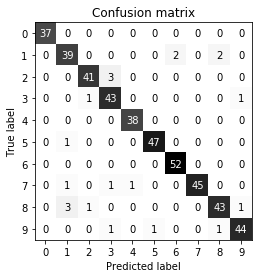

In [87]:
scores_image = heatmap(confusion_matrix(y_test,pred), xlabel='Predicted label', ylabel='True label', 
                       xticklabels=digits.target_names, yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt='%d')
plt.title('Confusion matrix')
plt.gca().invert_yaxis()

In [88]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

   micro avg       0.95      0.95      0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [89]:
print('Micro average f1 score: {:.3f}'.format(f1_score(y_test, pred, average='micro')))
print('Macro average f1 score: {:.3f}'.format(f1_score(y_test, pred, average='macro')))

Micro average f1 score: 0.953
Macro average f1 score: 0.954


In [90]:
# 分类问题的默认评分是精度
print('Default scroing: {}'.format(cross_val_score(SVC(), digits.data, digits.target == 9)))
# 指定‘scoring=accuracy’不会改变结果
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9, scoring='accuracy')
print('Explicit accuracy scoring: {}'.format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring='roc_auc')
print('AUC scoring: {}'.format(roc_auc))

/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The defaul

Default scroing: [0.89983306 0.89983306 0.89983306]


/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The defaul

Explicit accuracy scoring: [0.89983306 0.89983306 0.89983306]


/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AUC scoring: [0.99372294 0.98957947 0.99594929]


In [91]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state=0)
# 我们给出了不太好的网格来说明
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# 使用默认的精度
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print('Grid-Search with accuracy')
print('Best parameters:', grid.best_params_)
print('Best cross-validation score (accuracy): {:.3f}'.format(grid.best_score_))
print('Test set AUC: {:.3f}'.format(roc_auc_score(y_test, grid.decision_function(X_test))))
print('Test set accuracy: {:.3f}'.format(grid.score(X_test, y_test)))

/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy): 0.970
Test set AUC: 0.992
Test set accuracy: 0.973


In [92]:
# 使用AUC评分来代替
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring='roc_auc')
grid.fit(X_train, y_train)
print('\nGrid-Search with AUC')
print('Best parameters:', grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print('Test set AUC: {:.3f}'.format(roc_auc_score(y_test, grid.decision_function(X_test))))
print('Test set accuracy: {:.3f}'.format(grid.score(X_test, y_test)))

/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.997
Test set AUC: 1.000
Test set accuracy: 1.000


In [94]:
from sklearn.metrics.scorer import SCORERS
print('Availabel scorers: \n{}'.format(sorted(SCORERS.keys())))

Availabel scorers: 
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'brier_score_loss', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
